In [1]:
from train_vae import *

In [2]:
# 1. data
train_images, train_labels, test_images, test_labels = mnist_data()
samples, sample_labels = sample_and_categorize(train_images, train_labels, number=60000)

In [3]:
print(samples.shape)
print(sample_labels.shape)

(60000, 28, 28, 1)
(60000,)


In [4]:
x_train = np.reshape(samples, (-1, 784))
x_train_samples = np.reshape(samples, (-1, 784))


print(x_train.shape)
print(x_train_samples.shape)

(60000, 784)
(60000, 784)


In [8]:
model_pre = VAE(latent_dim=12)

dummy_eps_input = np.zeros((len(x_train), model_pre.latent_dim))

# Fit the model. Note that the 'eps' input is ignored because it is an Input tensor.
history = model_pre.model.fit([x_train, dummy_eps_input], x_train, shuffle=True, epochs=200, batch_size=100)
# plot_learning_curve(history)

# classifier = model_pre.classifier()
# encodings_pretrain = model_pre.encoder.predict(x_train_samples)
# image_encoder = clone_encoder(model_pre.image_encoder())

Epoch 1/200
600/600 [==============================] - 2s 2ms/step - loss: 133.4053
Epoch 2/200
600/600 [==============================] - 1s 2ms/step - loss: 101.1186
Epoch 3/200
600/600 [==============================] - 1s 2ms/step - loss: 94.2499
Epoch 4/200
600/600 [==============================] - 1s 2ms/step - loss: 90.6570
Epoch 5/200
600/600 [==============================] - 1s 2ms/step - loss: 88.4244
Epoch 6/200
600/600 [==============================] - 1s 2ms/step - loss: 86.8826
Epoch 7/200
600/600 [==============================] - 1s 2ms/step - loss: 85.7628
Epoch 8/200
600/600 [==============================] - 1s 2ms/step - loss: 84.8456
Epoch 9/200
600/600 [==============================] - 1s 2ms/step - loss: 84.1179
Epoch 10/200
600/600 [==============================] - 1s 2ms/step - loss: 83.4996
Epoch 11/200
600/600 [==============================] - 1s 2ms/step - loss: 82.9627
Epoch 12/200
600/600 [==============================] - 1s 2ms/step - loss: 82.5075

600/600 [==============================] - 1s 2ms/step - loss: 74.9171
Epoch 99/200
600/600 [==============================] - 1s 2ms/step - loss: 74.9105
Epoch 100/200
600/600 [==============================] - 1s 2ms/step - loss: 74.8922
Epoch 101/200
600/600 [==============================] - 1s 2ms/step - loss: 74.8667
Epoch 102/200
600/600 [==============================] - 1s 2ms/step - loss: 74.8562
Epoch 103/200
600/600 [==============================] - 1s 2ms/step - loss: 74.8245
Epoch 104/200
600/600 [==============================] - 1s 2ms/step - loss: 74.8197
Epoch 105/200
600/600 [==============================] - 1s 2ms/step - loss: 74.7873
Epoch 106/200
600/600 [==============================] - 1s 2ms/step - loss: 74.7698
Epoch 107/200
600/600 [==============================] - 1s 2ms/step - loss: 74.7661
Epoch 108/200
600/600 [==============================] - 1s 2ms/step - loss: 74.7451
Epoch 109/200
600/600 [==============================] - 1s 2ms/step - loss: 74.

600/600 [==============================] - 1s 2ms/step - loss: 73.8582
Epoch 195/200
600/600 [==============================] - 1s 2ms/step - loss: 73.8319
Epoch 196/200
600/600 [==============================] - 1s 2ms/step - loss: 73.8251
Epoch 197/200
600/600 [==============================] - 1s 2ms/step - loss: 73.8306
Epoch 198/200
600/600 [==============================] - 1s 2ms/step - loss: 73.8256
Epoch 199/200
600/600 [==============================] - 1s 2ms/step - loss: 73.8084
Epoch 200/200
600/600 [==============================] - 1s 2ms/step - loss: 73.8103


In [9]:
model_pre.save()

/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


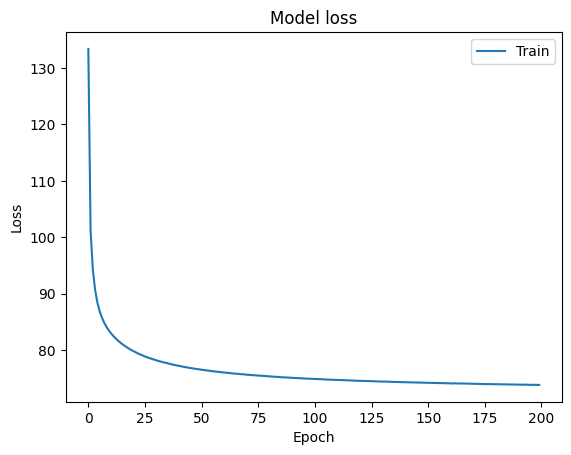

In [10]:
plot_learning_curve(history)

In [25]:
cnn = load_model("trained_models/classifier.h5")

In [33]:
xai = xai_model(model_pre.decoder, cnn)

In [34]:
z = [2, 2]

In [47]:
img = model_pre.decoder.predict([z])
img = np.reshape(img[0], (28, 28))

y = xai.predict([z])[0]

[1.9521920e-04 9.9380988e-01 1.9573073e-03 9.7314387e-06 2.9454852e-04
 1.1761693e-04 1.2320414e-03 1.6725443e-03 3.3604572e-04 3.7514500e-04]


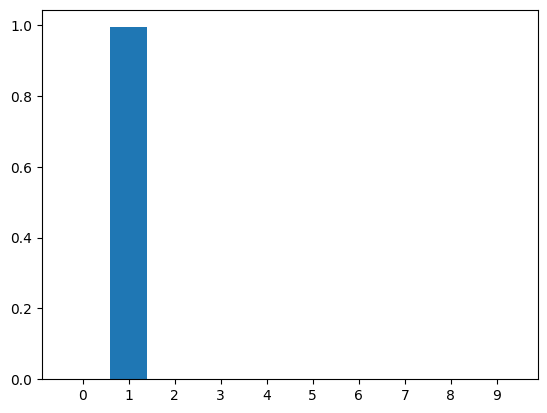

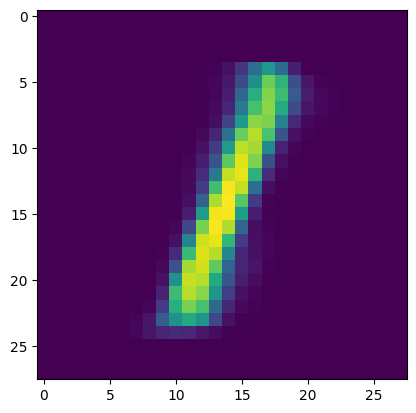

In [50]:
print(y)
plt.bar(range(len(y)), y)
plt.xticks(range(len(y)), range(len(y)))

plt.show()
plt.imshow(img)
